In this Fraud Loan data set we need to make a model and predict that whether a person should be given a 
loan on his/her previous history and other factors like Income, Education, Sel employed or not, the data is of 
classification type as aat last we need to check the loan status whether yes or no, i.e laon should be 
given or not to avoid the fraud and loss of money, which leads to low risk and more efficient work culture.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
fd=pd.read_csv('Fraud_loan.csv')
fd.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [3]:
fd.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
fd.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fd['Loan_Status']=le.fit_transform(fd['Loan_Status'])
fd['Married']=le.fit_transform(fd['Married'].astype(str))
fd['Gender']=le.fit_transform(fd['Gender'].astype(str))
fd['Dependents']=le.fit_transform(fd['Dependents'].astype(str))
fd['Education']=le.fit_transform(fd['Education'].astype(str))
fd['Self_Employed']=le.fit_transform(fd['Self_Employed'].astype(str))
fd['Property_Area']=le.fit_transform(fd['Property_Area'])

In [6]:
fd.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


Now below we can see the target data does not have equality amongst each other, yes shows more chances of 
prediction as compare to no, the model without balancing would show good accuracy, but that accuracy will not show right 
results, as the data is baised and most of the times results will show answer 1,
that is loan can be given, which is wrong, so we need to resample the data by upsampling

In [7]:
fd['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

Text(0, 0.5, 'Frequency')

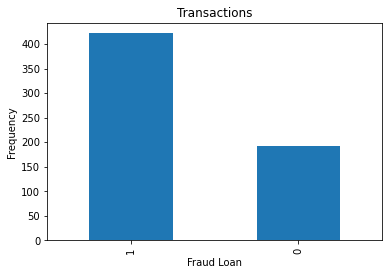

In [8]:
count=pd.value_counts(fd['Loan_Status'])
count.plot(kind='bar')
plt.title('Transactions')
plt.xlabel('Fraud Loan')
plt.ylabel('Frequency')

In [9]:
from sklearn.utils import resample
fd_majority=fd[fd.Loan_Status==1]
fd_minority=fd[fd.Loan_Status==0]

fd_minority_upsampled = resample(fd_minority,replace=True,n_samples=422, random_state=123)

Loan_Status= pd.concat([fd_majority, fd_minority_upsampled])

In [10]:
Loan_Status.Loan_Status.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [11]:
fd.Loan_Status.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

In [12]:
ln=Loan_Status

In [13]:
ln.dtypes

Loan_ID               object
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [14]:
ln.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           36
Loan_Amount_Term     19
Credit_History       61
Property_Area         0
Loan_Status           0
dtype: int64

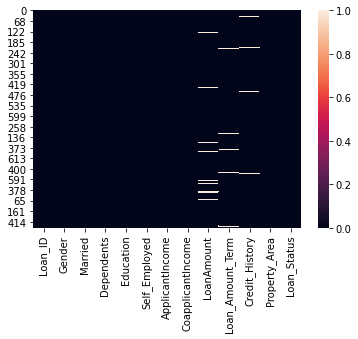

In [15]:
sns.heatmap(ln.isnull())

In [16]:
ln['LoanAmount']=ln['LoanAmount'].fillna(ln['LoanAmount'].mode()[0])
ln['Loan_Amount_Term']=ln['Loan_Amount_Term'].fillna(ln['Loan_Amount_Term'].mode()[0])
ln['Credit_History']=ln['Credit_History'].fillna(ln['Credit_History'].mode()[0])



In [17]:
ln.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [18]:
ln.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.361866,0.102494,0.018725,-0.083005,0.079062,-0.013099,0.099884,-0.049651,0.020835,-0.055344,-0.011096
Married,0.361866,1.000000,0.307254,0.046848,-0.057225,0.053791,0.048059,0.110902,-0.097831,-0.027856,-0.017515,0.109166
Dependents,0.102494,0.307254,1.000000,0.106488,-0.014105,0.125520,0.091838,0.139355,-0.073666,-0.145666,0.054229,-0.033732
Education,0.018725,0.046848,0.106488,1.000000,-0.030659,-0.140152,-0.067415,-0.174344,-0.076777,-0.079003,-0.054277,-0.065618
Self_Employed,-0.083005,-0.057225,-0.014105,-0.030659,1.000000,0.036140,0.176893,0.090455,-0.090175,0.089629,0.004664,0.027579
ApplicantIncome,0.079062,0.053791,0.125520,-0.140152,0.036140,1.000000,-0.108050,0.531488,0.002775,-0.071818,-0.079902,-0.043831
CoapplicantIncome,-0.013099,0.048059,0.091838,-0.067415,0.176893,-0.108050,1.000000,0.249795,-0.166907,0.016147,0.039382,-0.062627
LoanAmount,0.099884,0.110902,0.139355,-0.174344,0.090455,0.531488,0.249795,1.000000,0.025855,0.002577,-0.089649,-0.056250
Loan_Amount_Term,-0.049651,-0.097831,-0.073666,-0.076777,-0.090175,0.002775,-0.166907,0.025855,1.000000,-0.034382,-0.072836,-0.004630
Credit_History,0.020835,-0.027856,-0.145666,-0.079003,0.089629,-0.071818,0.016147,0.002577,-0.034382,1.000000,-0.017250,0.470537


In [19]:
ln.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000,844.000000
mean,0.845972,0.636256,0.875592,0.221564,0.227488,5722.609005,1720.741611,148.420616,341.744076,0.792654,1.007109,0.500000
std,0.427379,0.488699,1.159794,0.415545,0.515849,7728.313707,3454.610534,84.662709,67.600606,0.405646,0.806231,0.500296
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2786.500000,0.000000,102.750000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3750.000000,1301.000000,127.000000,360.000000,1.000000,1.000000,0.500000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5819.500000,2312.000000,170.000000,360.000000,1.000000,2.000000,1.000000
max,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


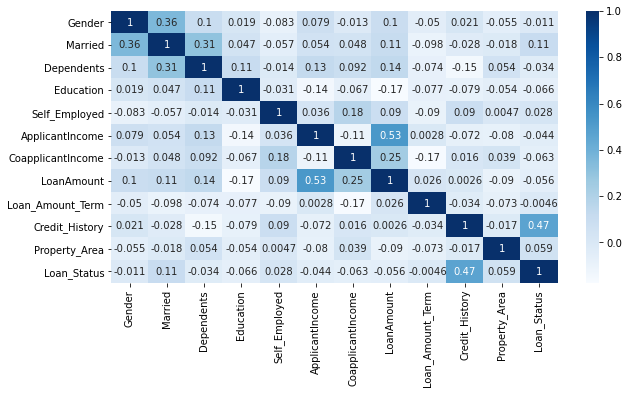

In [20]:
plt.figure(figsize=(10,5))
sns.heatmap(ln.corr(), cmap='Blues', annot=True)

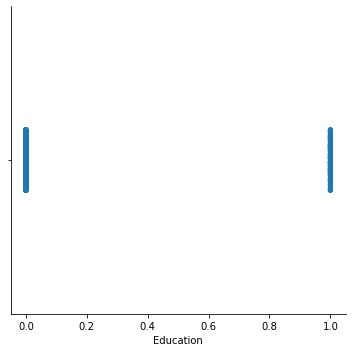

In [21]:
sns.catplot(x='Education', data=ln)

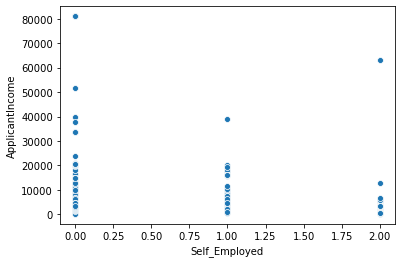

In [22]:
sns.scatterplot(x='Self_Employed',y='ApplicantIncome',data=ln)

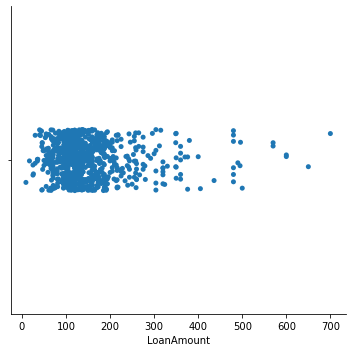

In [23]:
sns.catplot(x='LoanAmount', data=ln)

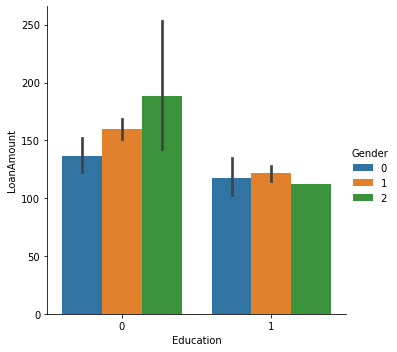

In [24]:
sns.catplot(x='Education', y='LoanAmount', hue='Gender', data=ln, kind='bar')

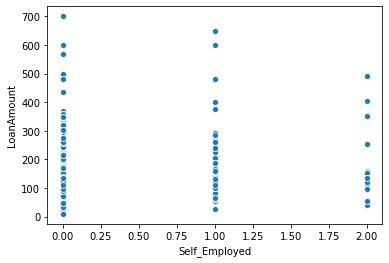

In [25]:
sns.scatterplot(x='Self_Employed',y='LoanAmount',data=ln)

In [26]:
ln.skew()

Gender              -0.849434
Married             -0.475591
Dependents           1.071508
Education            1.343282
Self_Employed        2.225979
ApplicantIncome      6.808146
CoapplicantIncome    8.051031
LoanAmount           2.476034
Loan_Amount_Term    -2.142950
Credit_History      -1.446331
Property_Area       -0.012903
Loan_Status          0.000000
dtype: float64

(array([724.,  87.,  21.,   0.,   5.,   0.,   1.,   1.,   0.,   5.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <a list of 10 Patch objects>)

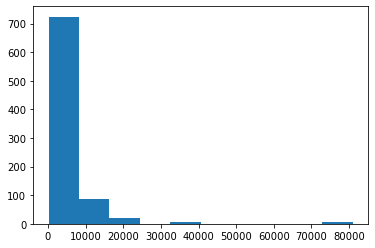

In [27]:
plt.hist(ln['ApplicantIncome'], bins=10)

(array([ 96., 446., 199.,  49.,  26.,  11.,   8.,   3.,   4.,   2.]),
 array([  9. ,  78.1, 147.2, 216.3, 285.4, 354.5, 423.6, 492.7, 561.8,
        630.9, 700. ]),
 <a list of 10 Patch objects>)

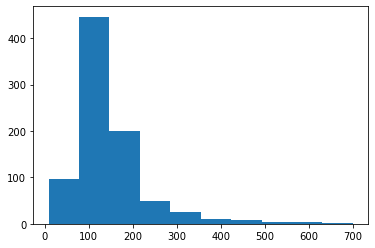

In [28]:
plt.hist(ln['LoanAmount'], bins=10)

(array([  6.,   7.,   3.,  67.,   8.,   0.,  18., 707.,   0.,  28.]),
 array([ 12. ,  58.8, 105.6, 152.4, 199.2, 246. , 292.8, 339.6, 386.4,
        433.2, 480. ]),
 <a list of 10 Patch objects>)

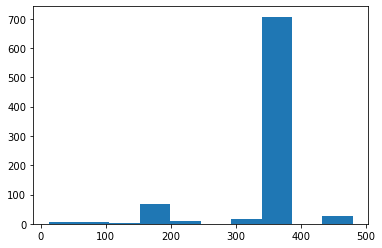

In [29]:
plt.hist(ln['Loan_Amount_Term'], bins=10)

(array([271.,   0.,   0.,   0.,   0., 296.,   0.,   0.,   0., 277.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

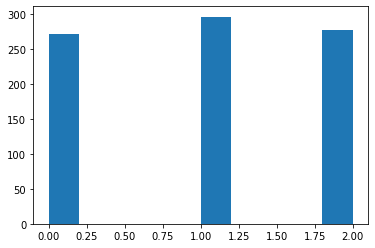

In [30]:
plt.hist(ln['Property_Area'], bins=10)

In [31]:
ln.skew()

Gender              -0.849434
Married             -0.475591
Dependents           1.071508
Education            1.343282
Self_Employed        2.225979
ApplicantIncome      6.808146
CoapplicantIncome    8.051031
LoanAmount           2.476034
Loan_Amount_Term    -2.142950
Credit_History      -1.446331
Property_Area       -0.012903
Loan_Status          0.000000
dtype: float64

In [32]:
ld=ln.copy()

In [33]:
ld['ApplicantIncome']=np.log1p(ld['ApplicantIncome'])

In [34]:
ld['CoapplicantIncome']=np.log1p(ld['CoapplicantIncome'])
ld['Dependents']=np.log1p(ld['Dependents'])
ld['Education']=np.log1p(ld['Education'])
ld['Self_Employed']=np.log1p(ld['Self_Employed'])
ld['LoanAmount']=np.log1p(ld['LoanAmount'])

In [35]:
ld['Loan_Amount_Term']=(ld['Loan_Amount_Term']/20)**10
ld['Credit_History']=(ld['Credit_History']/20)**10

In [36]:
from scipy.stats import boxcox
ld['Loan_Amount_Term']=boxcox(ld['Loan_Amount_Term'],0)

In [37]:
ld.skew()

Gender              -0.849434
Married             -0.475591
Dependents           0.619784
Education            1.343282
Self_Employed        1.893797
ApplicantIncome      0.558196
CoapplicantIncome   -0.203014
LoanAmount          -0.021548
Loan_Amount_Term    -4.522341
Credit_History       0.000000
Property_Area       -0.012903
Loan_Status          0.000000
dtype: float64

we need to check the outliers, as they affect the results in 
many ways as they are odd values and there average is way way more than the usual data's average

{'whiskers': [<matplotlib.lines.Line2D at 0xdd9f400>,
 'caps': [<matplotlib.lines.Line2D at 0xdd9fac0>,
 'boxes': [<matplotlib.lines.Line2D at 0xdd9f0a0>],
 'medians': [<matplotlib.lines.Line2D at 0xdd971c0>],
 'fliers': [<matplotlib.lines.Line2D at 0xdd974c0>],
 'means': []}

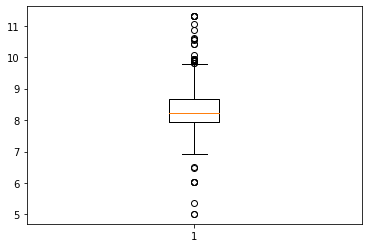

In [38]:
plt.boxplot(ld['ApplicantIncome'])

{'whiskers': [<matplotlib.lines.Line2D at 0xddf9dc0>,
 'caps': [<matplotlib.lines.Line2D at 0xde084c0>,
 'boxes': [<matplotlib.lines.Line2D at 0xddf9a60>],
 'medians': [<matplotlib.lines.Line2D at 0xde08b80>],
 'fliers': [<matplotlib.lines.Line2D at 0xde08e80>],
 'means': []}

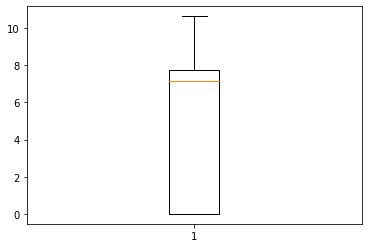

In [39]:
plt.boxplot(ld['CoapplicantIncome'])

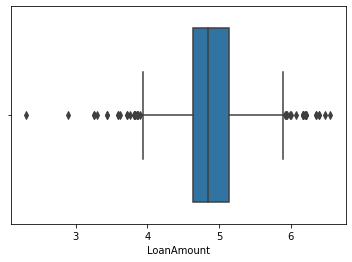

In [40]:
sns.boxplot(ld['LoanAmount'])

In [41]:
lo=ld.drop('Loan_ID', axis=1)

In [42]:
from scipy.stats import zscore
z=np.abs(zscore(lo))
lr=lo[(z<3).all(axis=1)]
lr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.000000,0.000000,0.000000,8.674197,0.000000,4.795791,28.903718,9.765625e-14,2,1
2,1,1,0.000000,0.000000,0.693147,8.006701,0.000000,4.204693,28.903718,9.765625e-14,2,1
3,1,1,0.000000,0.693147,0.000000,7.857094,7.765993,4.795791,28.903718,9.765625e-14,2,1
4,1,0,0.000000,0.000000,0.000000,8.699681,0.000000,4.955827,28.903718,9.765625e-14,2,1
5,1,1,1.098612,0.000000,0.693147,8.597482,8.342125,5.590987,28.903718,9.765625e-14,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
597,1,0,1.609438,0.000000,0.000000,8.002360,0.000000,4.488636,28.903718,0.000000e+00,1,0
73,1,1,1.386294,0.693147,0.000000,8.467162,0.000000,4.564348,28.903718,0.000000e+00,1,0
23,2,1,1.098612,0.693147,0.000000,8.121480,7.559038,4.727388,28.903718,0.000000e+00,0,0
128,1,1,0.693147,0.000000,0.693147,9.260463,8.256088,5.081404,21.972246,0.000000e+00,2,0


In [43]:
x=lo.iloc[:,0:-1]
y=lo.iloc[:,-1]

In [44]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()
x=sd.fit_transform(x)

In [45]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
x=pca.fit_transform(x)

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
max_scr=0
for r_state in range(42,101):
    x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=r_state, test_size=0.20)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    y_pred=lg.predict(x_test)
    acc_scr=accuracy_score(y_test,y_pred)
    if acc_scr>max_scr:
        max_scr=acc_scr
        final_rstate=r_state
        
print('The corresponding value for maximum rstate',final_rstate, 'to the r2 Score is', max_scr)

The corresponding value for maximum rstate 65 to the r2 Score is 0.677037037037037


In [47]:
x_test,x_train,y_test,y_train=train_test_split(x,y,random_state=65, test_size=0.20)
lg=LogisticRegression()
lg.fit(x_train,y_train)
y_pred=lg.predict(x_test)
acc_scr=accuracy_score(y_test,y_pred)
print('accuracy score',acc_scr)
print('Confusion matrix',confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

accuracy score 0.677037037037037
Confusion matrix [[186 164]
 [ 54 271]]
              precision    recall  f1-score   support

           0       0.78      0.53      0.63       350
           1       0.62      0.83      0.71       325

    accuracy                           0.68       675
   macro avg       0.70      0.68      0.67       675
weighted avg       0.70      0.68      0.67       675



In [48]:
from sklearn.model_selection import cross_val_score
cross_val_scr=cross_val_score(lg,x,y,scoring='accuracy', cv=5).mean()
cross_val_scr

0.6374189912651451

In [49]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [50]:
lg=LogisticRegression()
svc=SVC()
knn=KNeighborsClassifier()
dtc=DecisionTreeClassifier()
gnb=GaussianNB()

In [51]:
models=[]
models.append((lg,'LogisticRegression'))
models.append((svc,'svc'))
models.append((knn,'KNeighborsClassifier'))
models.append((dtc,'DecisionTreeClassifier'))
models.append((gnb,'GaussianNB'))


In [52]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

********** LogisticRegression *****************
m


Accuracy Score 0.677037037037037


Cross_val_score 0.637296918767507


roc_auc_score 0.6826373626373626


              precision    recall  f1-score   support

           0       0.78      0.53      0.63       350
           1       0.62      0.83      0.71       325

    accuracy                           0.68       675
   macro avg       0.70      0.68      0.67       675
weighted avg       0.70      0.68      0.67       675



Confusion_matrix [[186 164]
 [ 54 271]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


********** svc *****************
m


Accuracy Score 0.6785185185185185




No handles with labels found to put in legend.


Cross_val_score 0.7038375350140056


roc_auc_score 0.685934065934066


              precision    recall  f1-score   support

           0       0.82      0.49      0.61       350
           1       0.62      0.89      0.73       325

    accuracy                           0.68       675
   macro avg       0.72      0.69      0.67       675
weighted avg       0.72      0.68      0.67       675



Confusion_matrix [[170 180]
 [ 37 288]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


********** KNeighborsClassifier *****************
m


Accuracy Score 0.6488888888888888


Cross_val_score 0.7441736694677872


roc_auc_score 0.6556043956043955


              precision    recall  f1-score   support

           0       0.76      0.47      0.58       350
           1       0.60      0.84      0.70       325

    accuracy                           0.65       675
   macro avg       0.68      0.66      0.64       675
weighted avg       0.68      0.65      0.64       675



Confusion_matrix [[166

No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


********** DecisionTreeClassifier *****************
m


Accuracy Score 0.677037037037037


Cross_val_score 0.84593837535014


roc_auc_score 0.6797802197802197


              precision    recall  f1-score   support

           0       0.73      0.61      0.66       350
           1       0.64      0.75      0.69       325

    accuracy                           0.68       675
   macro avg       0.68      0.68      0.68       675
weighted avg       0.68      0.68      0.68       675



Confusion_matrix [[212 138]
 [ 80 245]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)


********** GaussianNB *****************
m


Accuracy Score 0.6607407407407407


Cross_val_score 0.665826330532213


roc_auc_score 0.6681318681318681


              precision    recall  f1-score   support

           0       0.79      0.47      0.59       350
           1       0.60      0.87      0.71       325

    accuracy                           0.66       675
   macro avg       0.70      0.67      0.65       675
weighted avg       0.70      0.66      0.65       675



Confusion_matrix [[164 186]
 [ 43 282]]




No handles with labels found to put in legend.


AxesSubplot(0.125,0.808774;0.62x0.0712264)




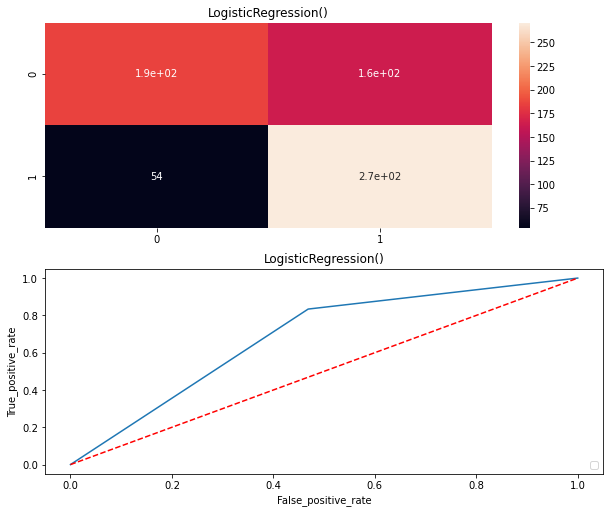

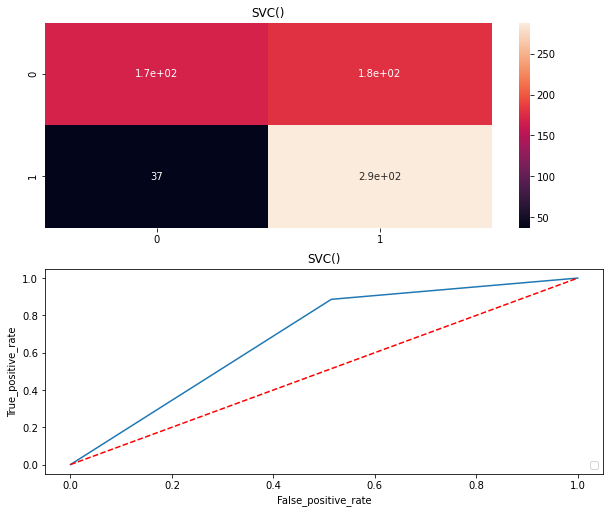

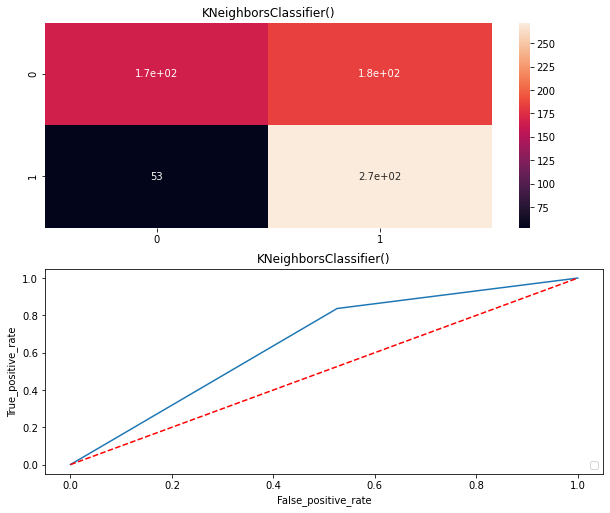

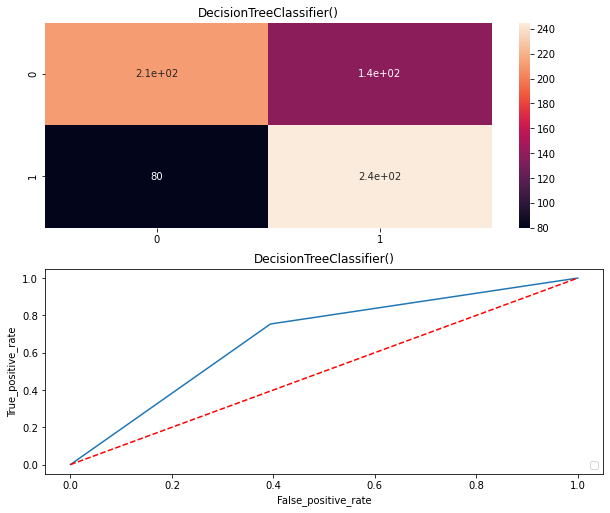

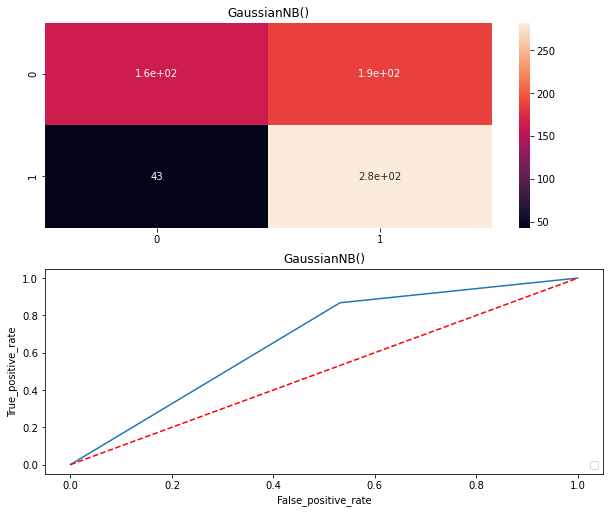

In [53]:
Model=[]
for m, model_name in models:
    print('**********',model_name,'*****************')
    m.fit(x_train,y_train)
    print('m')
    pred_y=m.predict(x_test)
    print('\n')
    acc=accuracy_score(y_test,pred_y)
    print('Accuracy Score', acc)
    print('\n')
    csc=cross_val_score(m,x,y,cv=10, scoring='accuracy').mean()
    print('Cross_val_score', csc)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred_y)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    print('\n')
    print(classification_report(y_test,pred_y))
    print('\n')
    cms=confusion_matrix(y_test,pred_y)
    print('Confusion_matrix',cms)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(m)
    print(sns.heatmap(cms,annot=True))
    plt.subplot(912)
    plt.title(m)
    plt.plot(false_positive_rate,true_positive_rate)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True_positive_rate')
    plt.xlabel('False_positive_rate')
    print('\n')
    

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()
parameters={'learning_rate':[0.1,0.01,0.001,0.0001], 'n_estimators':[100,200,500,1000], 'base_estimator':[dtc]}
grad=GridSearchCV(ada,parameters,cv=5)
grad.fit(x,y)
grad.best_params_

{'base_estimator': DecisionTreeClassifier(),
 'learning_rate': 0.001,
 'n_estimators': 1000}

In [55]:
gbra=AdaBoostClassifier(learning_rate=0.1, n_estimators=200, base_estimator=dtc)
gbra.fit(x_train,y_train)
gbra.score(x_train,y_train)
pred_y=gbra.predict(x_test)
acc_scrrg=accuracy_score(y_test,pred_y)
print('acc score',acc_scrrg)


acc score 0.6933333333333334


In [56]:
df1=pd.DataFrame(pred_y)
df1.to_csv('dtc_Loan_Fraud.csv')

In [57]:
import joblib
joblib.dump(dtc,'dtc_Loan_Fraud.pkl')

['dtc_Loan_Fraud.pkl']

We could see dtc see was showing better results, so we selected the model on dtc